# Pembuatan Data Sintetis Maintenance Truk

## Pendahuluan

Notebook ini bertujuan untuk membuat data sintetis berkualitas tinggi berdasarkan data maintenance truk HINO (AD1489HR). Data sintetis yang dibuat akan mengikuti pola realistis dari data asli dengan perbaikan konsistensi pada pembacaan odometer yang seharusnya bertambah seiring waktu.

## Mengimpor Library yang Diperlukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

## Membaca dan Memeriksa Data Asli

In [41]:
data = """Action Date,Asset,Parts & Services,Action,Current Odometer
2024-06-27 07:00:00,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Service,"973,253.00"
2024-05-30 07:00:00,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Service,"973,252.00"
2024-04-01 11:41:14,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Deactivate,"964,170.00"
2024-04-01 11:41:14,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Deactivate,"964,170.00"
2024-03-21 22:49:52,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"999,106.00"
2024-03-21 22:10:11,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"999,106.00"
2024-03-19 23:53:24,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Deactivate,"998,778.00"
2024-03-19 23:53:24,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Deactivate,"998,778.00"
2024-03-19 23:52:41,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"998,778.00"
2024-03-19 22:47:13,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"998,778.00"
2024-03-12 16:26:24,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,"999,651.00"
2024-03-12 16:26:24,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,"999,651.00"
2024-03-12 08:37:41,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,"999,651.00"
2024-03-12 08:37:41,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,"999,651.00"
2024-03-10 22:59:16,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,"959,337.00"
2024-03-10 22:59:15,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,"959,337.00"
2024-03-09 22:41:16,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,"959,076.00"
2024-03-09 22:41:16,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,"959,076.00"
2024-03-08 22:41:15,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,"958,751.00"
2024-03-08 22:41:15,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,"958,751.00"
2023-11-02 07:00:00,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Service,"923,236.00"
"""

In [57]:
# Membuat DataFrame dari string data
import io
df = pd.read_csv(io.StringIO(data))

print("Sampel Data Asli:")
df

Sampel Data Asli:


,Action Date,Asset,Parts & Services,Action,Current Odometer
0,2024-06-27 07:00:00,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Service,"973,253.00"
1,2024-05-30 07:00:00,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Service,"973,252.00"
2,2024-04-01 11:41:14,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Deactivate,"964,170.00"
3,2024-04-01 11:41:14,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Deactivate,"964,170.00"
4,2024-03-21 22:49:52,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"999,106.00"
5,2024-03-21 22:10:11,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"999,106.00"
6,2024-03-19 23:53:24,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Deactivate,"998,778.00"
7,2024-03-19 23:53:24,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Deactivate,"998,778.00"
8,2024-03-19 23:52:41,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"998,778.00"
9,2024-03-19 22:47:13,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"998,778.00"


## Membersihkan dan Memproses Data

In [60]:
# Mengkonversi kolom tanggal ke format datetime
df['Action Date'] = pd.to_datetime(df['Action Date'])

# Membersihkan kolom odometer
df['Current Odometer'] = df['Current Odometer'].str.replace(',', '').astype(float)

# Mengurutkan data berdasarkan tanggal
df = df.sort_values('Action Date')

# Menampilkan informasi data
print("\nInformasi Data:")
df.info()

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
df.describe()
df


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 20 to 0
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Action Date       21 non-null     datetime64[ns]
 1   Asset             21 non-null     object        
 2   Parts & Services  21 non-null     object        
 3   Action            21 non-null     object        
 4   Current Odometer  21 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1008.0+ bytes

Statistik Deskriptif:


,Action Date,Asset,Parts & Services,Action,Current Odometer
20,2023-11-02 07:00:00,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Service,923236.0
18,2024-03-08 22:41:15,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,958751.0
19,2024-03-08 22:41:15,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,958751.0
17,2024-03-09 22:41:16,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,959076.0
16,2024-03-09 22:41:16,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,959076.0
15,2024-03-10 22:59:15,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,959337.0
14,2024-03-10 22:59:16,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,959337.0
13,2024-03-12 08:37:41,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,999651.0
12,2024-03-12 08:37:41,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,999651.0
11,2024-03-12 16:26:24,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,999651.0


## Analisis Data Asli

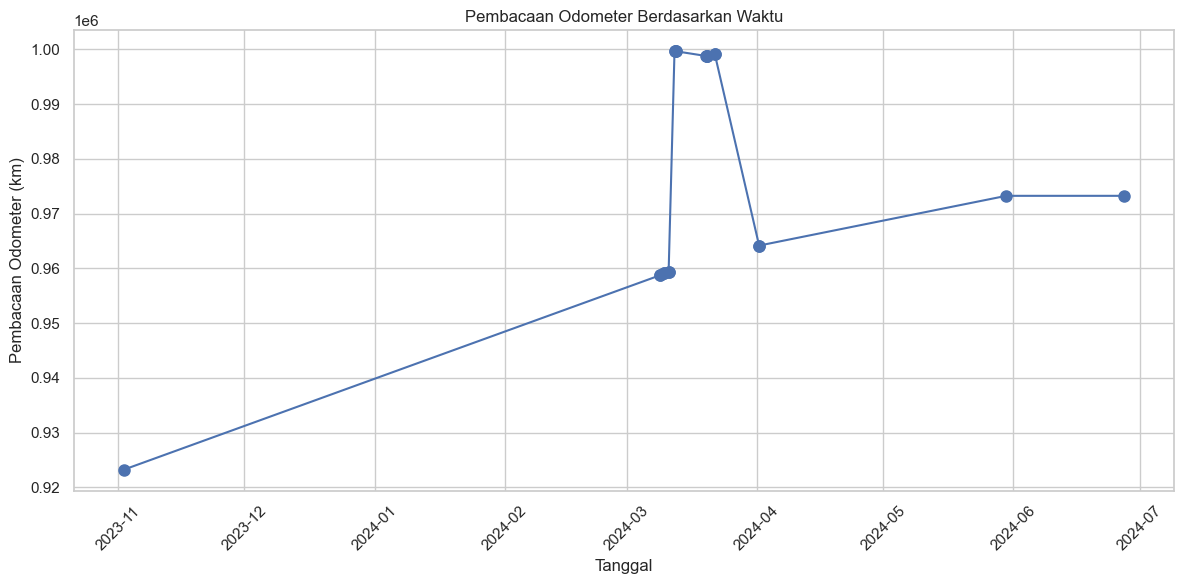

In [66]:
# Melihat distribusi nilai odometer
plt.figure(figsize=(12, 6))
plt.plot(df['Action Date'], df['Current Odometer'], 'o-', markersize=8)
plt.title('Pembacaan Odometer Berdasarkan Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Pembacaan Odometer (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

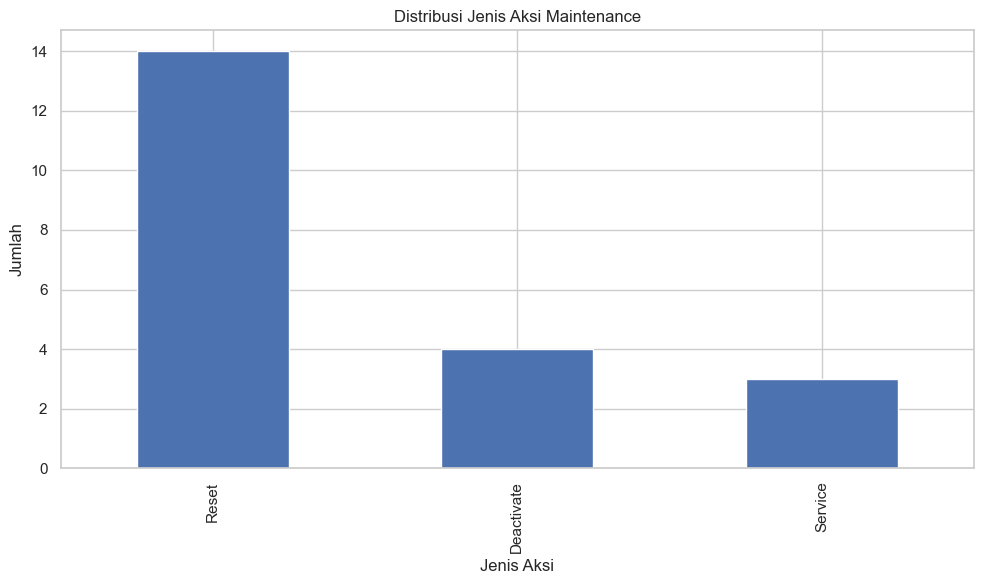

In [67]:
# Menganalisis distribusi jenis aksi maintenance
plt.figure(figsize=(10, 6))
df['Action'].value_counts().plot(kind='bar')
plt.title('Distribusi Jenis Aksi Maintenance')
plt.xlabel('Jenis Aksi')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

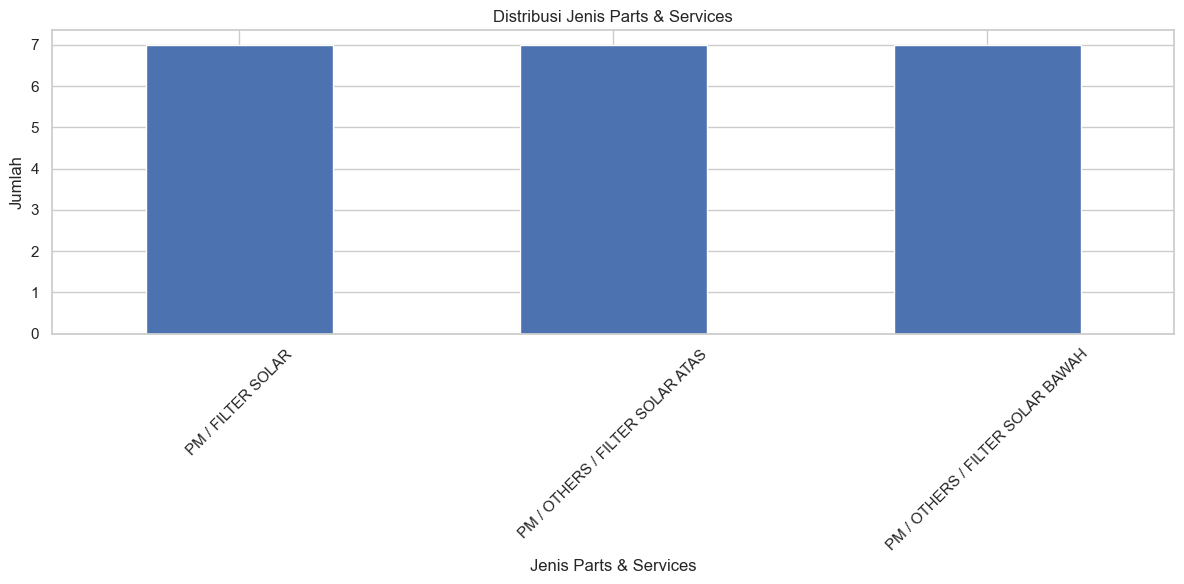

In [46]:
# Menganalisis jenis parts & services
plt.figure(figsize=(12, 6))
df['Parts & Services'].value_counts().plot(kind='bar')
plt.title('Distribusi Jenis Parts & Services')
plt.xlabel('Jenis Parts & Services')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Menganalisis Pola Pergerakan Odometer


```python
df['next_date'] = df['Action Date'].shift(-1)
```
- Membuat kolom baru `next_date` yang berisi tanggal catatan berikutnya menggunakan fungsi `shift(-1)` pada kolom `Action Date`.
- Memudahkan perhitungan interval waktu antara dua catatan maintenance berurutan.

```python
df['days_diff'] = (df['next_date'] - df['Action Date']).dt.total_seconds() / (24 * 3600)
```
- Menghitung selisih waktu antara catatan saat ini dengan catatan berikutnya dalam satuan hari.
- Mengonversi perbedaan waktu dari detik ke hari dengan membagi `24 jam × 3600 detik`.


```python
df['odo_diff'] = df['Current Odometer'].diff().abs()
```
- Menghitung perbedaan pembacaan odometer antara catatan berurutan.
- Menggunakan fungsi `abs()` untuk memastikan nilai positif (jarak absolut).

```python
df_valid = df.dropna(subset=['days_diff', 'odo_diff'])
```
- Membuat DataFrame baru `df_valid` yang hanya berisi baris dengan nilai valid (tidak `NaN`).
- Penting karena baris pertama atau terakhir bisa memiliki `NaN` akibat operasi `shift` dan `diff`.
```

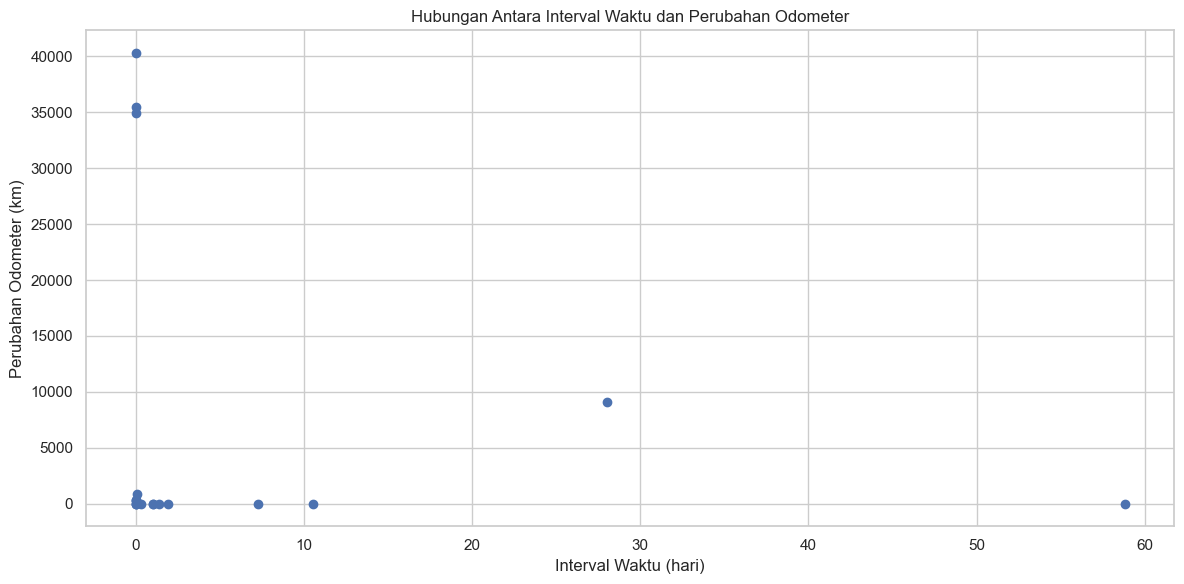

Rata-rata jarak tempuh harian: 1102.29 km


In [47]:
# Menghitung perubahan odometer harian
df['next_date'] = df['Action Date'].shift(-1)
df['days_diff'] = (df['next_date'] - df['Action Date']).dt.total_seconds() / (24 * 3600)
df['odo_diff'] = df['Current Odometer'].diff().abs()

# Menghilangkan baris dengan nilai NaN
df_valid = df.dropna(subset=['days_diff', 'odo_diff'])

# Menganalisis distribusi jarak tempuh harian
plt.figure(figsize=(12, 6))
plt.scatter(df_valid['days_diff'], df_valid['odo_diff'])
plt.title('Hubungan Antara Interval Waktu dan Perubahan Odometer')
plt.xlabel('Interval Waktu (hari)')
plt.ylabel('Perubahan Odometer (km)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Menghitung rata-rata jarak tempuh harian
avg_daily_distance = df_valid['odo_diff'].sum() / df_valid['days_diff'].sum()
print(f"Rata-rata jarak tempuh harian: {avg_daily_distance:.2f} km")

SANGAT TIDAK JELAS BUKAN?!?!?!?
___
## Membuat Model untuk Odometer Realistis

In [68]:
# Memilih data odometer yang valid (menghilangkan anomali)
# Menggunakan regresi linear untuk memodelkan pertumbuhan odometer seiring waktu

# Konversi tanggal ke nilai numerik (hari sejak tanggal terawal dalam data)
min_date = df['Action Date'].min()
df['days_since_min'] = (df['Action Date'] - min_date).dt.total_seconds() / (24 * 3600)

# Membuat model regresi linear
model = LinearRegression()
X = df['days_since_min'].values.reshape(-1, 1)
y = df['Current Odometer'].values
model.fit(X, y)

# Prediksi nilai odometer berdasarkan model
df['predicted_odometer'] = model.predict(X)

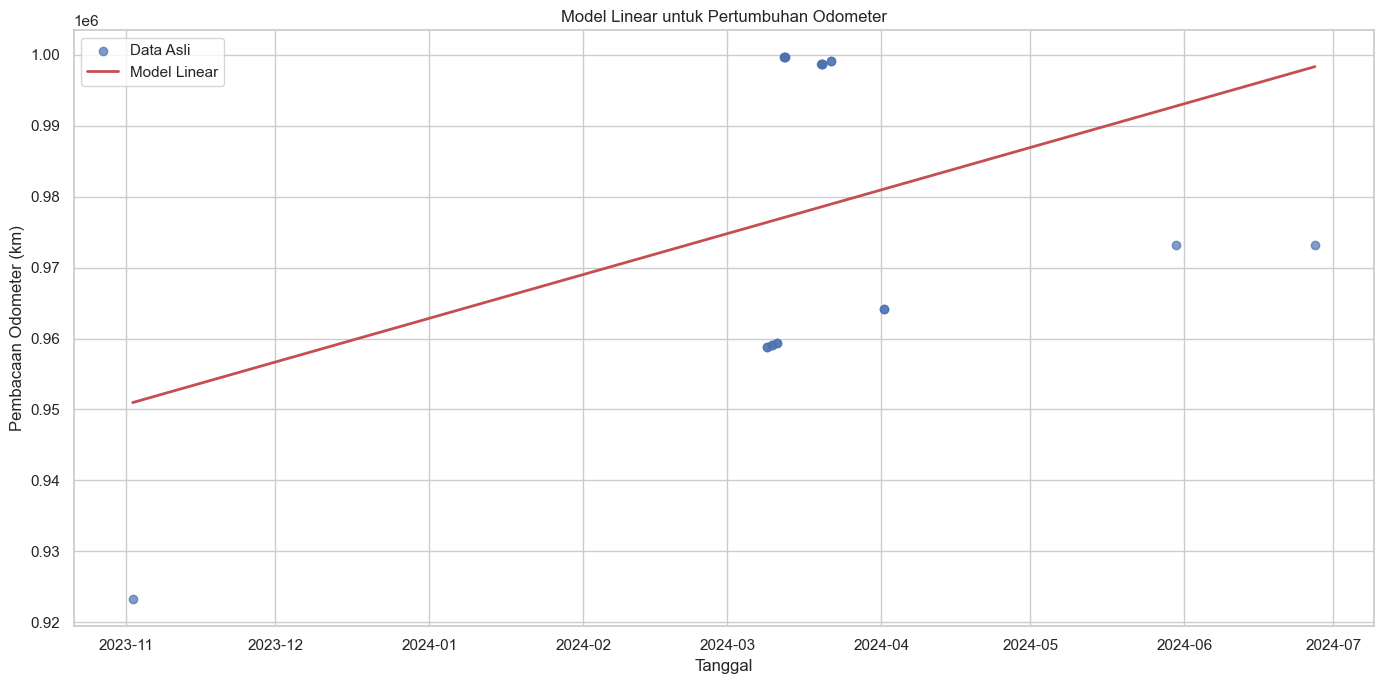

In [70]:
# Visualisasi hasil model
plt.figure(figsize=(14, 7))
plt.scatter(df['Action Date'], df['Current Odometer'], label='Data Asli', alpha=0.7)
plt.plot(df['Action Date'], df['predicted_odometer'], 'r-', label='Model Linear', linewidth=2)
plt.title('Model Linear untuk Pertumbuhan Odometer')
plt.xlabel('Tanggal')
plt.ylabel('Pembacaan Odometer (km)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
# Menghitung koefisien dan intercept model
slope = model.coef_[0]
intercept = model.intercept_
print(f"Model Linear: Odometer = {slope:.2f} * days + {intercept:.2f}")
print(f"Estimasi pertambahan odometer per hari: {slope:.2f} km")

Model Linear: Odometer = 199.09 * days + 950966.84
Estimasi pertambahan odometer per hari: 199.09 km


**Penjelasan:**
- `slope` adalah koefisien regresi (kemiringan garis), yang menunjukkan rata-rata pertambahan odometer setiap hari.
- `intercept` adalah nilai odometer saat jumlah hari = 0 (yaitu pada tanggal paling awal di data).
- Baris `print` menampilkan persamaan regresi linear dan estimasi pertambahan odometer per hari.

**Rumus Regresi Linear:**

Persamaan regresi linear yang digunakan adalah:

$
\text{Odometer} = m \times \text{days} + c
$

di mana:
- $(m)$ adalah slope (kemiringan garis, rata-rata pertambahan odometer per hari)
- $(c)$ adalah intercept (nilai odometer pada hari ke-0)

Dengan kata lain, setiap penambahan satu hari akan meningkatkan nilai odometer sebesar $m$ kilometer menurut model.

___
## Pembuatan *Synthetic Data*
### 1. Menetapkan Parameter Dasar

In [49]:
# Parameter dasar untuk pembuatan data sintetis
start_date = pd.Timestamp('2020-11-01')  # Mulai dari tanggal terawal data asli
end_date = pd.Timestamp('2024-12-31')   # Membuat proyeksi hingga akhir 2025
initial_odometer = 923000.0  # Nilai odometer awal berdasarkan data asli

# Parameter pola penggunaan
daily_avg_distance = slope  # Berdasarkan analisis dari model linear
weekend_factor = 0.7  # Asumsi jarak tempuh di akhir pekan lebih sedikit
seasonal_amplitude = daily_avg_distance * 0.2  # Variasi musiman 20% dari rata-rata

# Parameter maintenance
service_interval_km = 15000  # Interval service dalam kilometer
filter_reset_interval_km = 5000  # Interval reset filter dalam kilometer
deactivate_probability = 0.15  # Probabilitas deaktivasi komponen saat service

# Parts & Services yang tersedia
parts_services = [
    "PM / FILTER SOLAR",
    "PM / OTHERS / FILTER SOLAR ATAS",
    "PM / OTHERS / FILTER SOLAR BAWAH"
]

# Jenis aksi maintenance
actions = ["Service", "Reset", "Deactivate"]

### 2. Membuat Fungsi Pembangkit Data Sintetis

In [50]:
def generate_daily_odometer(start_date, end_date, initial_odometer, daily_avg_distance, 
                            weekend_factor, seasonal_amplitude):
    """
    Membuat data odometer harian dengan pola realistis
    """
    date_range = pd.date_range(start=start_date, end=end_date)
    daily_odo = []
    current_odo = initial_odometer
    
    for date in date_range:
        # Faktor hari dalam seminggu (weekend effect)
        day_of_week = date.dayofweek
        if day_of_week >= 5:  # 5=Sabtu, 6=Minggu
            day_factor = weekend_factor
        else:
            day_factor = 1.0
        
        # Faktor musiman (seasonal effect)
        month = date.month
        seasonal_factor = 1.0 + seasonal_amplitude * np.sin(2 * np.pi * (month - 3) / 12) / daily_avg_distance
        
        # Faktor random untuk variasi harian (5% dari rata-rata)
        random_factor = np.random.normal(1.0, 0.05)
        
        # Menghitung jarak tempuh hari ini
        distance_today = daily_avg_distance * day_factor * seasonal_factor * random_factor
        
        # Memastikan jarak tidak negatif
        distance_today = max(0, distance_today)
        
        # Menambahkan ke odometer
        current_odo += distance_today
        
        daily_odo.append({
            'Date': date,
            'Odometer': current_odo,
            'Daily_Distance': distance_today
        })
    
    return pd.DataFrame(daily_odo)

def generate_maintenance_events(daily_odometer_df, service_interval_km, filter_reset_interval_km, 
                               deactivate_probability, parts_services, actions):
    """
    Membuat data kejadian maintenance berdasarkan pembacaan odometer
    """
    maintenance_events = []
    last_service_odo = daily_odometer_df.iloc[0]['Odometer']
    last_filter_reset_odo = daily_odometer_df.iloc[0]['Odometer']
    
    # Menambahkan variasi pada interval maintenance (± 10%)
    service_interval_variation = lambda: service_interval_km * np.random.uniform(0.9, 1.1)
    filter_interval_variation = lambda: filter_reset_interval_km * np.random.uniform(0.9, 1.1)
    
    next_service_odo = last_service_odo + service_interval_variation()
    next_filter_reset_odo = last_filter_reset_odo + filter_interval_variation()
    
    for _, row in daily_odometer_df.iterrows():
        date = row['Date']
        current_odo = row['Odometer']
        
        # Cek jika perlu service
        if current_odo >= next_service_odo:
            # Buat event service
            maintenance_events.append({
                'Action Date': date,
                'Asset': 'AD1489HR - HINO FL8JNKA-GGJ (FL235JN)',
                'Parts & Services': 'PM / FILTER SOLAR',
                'Action': 'Service',
                'Current Odometer': current_odo
            })
            
            # Jika service, ada kemungkinan juga ada deactivate
            if np.random.random() < deactivate_probability:
                maintenance_events.append({
                    'Action Date': date,
                    'Asset': 'AD1489HR - HINO FL8JNKA-GGJ (FL235JN)',
                    'Parts & Services': 'PM / OTHERS / FILTER SOLAR ATAS',
                    'Action': 'Deactivate',
                    'Current Odometer': current_odo
                })
                maintenance_events.append({
                    'Action Date': date,
                    'Asset': 'AD1489HR - HINO FL8JNKA-GGJ (FL235JN)',
                    'Parts & Services': 'PM / OTHERS / FILTER SOLAR BAWAH',
                    'Action': 'Deactivate',
                    'Current Odometer': current_odo
                })
            
            last_service_odo = current_odo
            next_service_odo = current_odo + service_interval_variation()
            
        # Cek jika perlu reset filter
        if current_odo >= next_filter_reset_odo:
            # Buat event reset filter
            maintenance_events.append({
                'Action Date': date,
                'Asset': 'AD1489HR - HINO FL8JNKA-GGJ (FL235JN)',
                'Parts & Services': 'PM / FILTER SOLAR',
                'Action': 'Reset',
                'Current Odometer': current_odo
            })
            
            # Kadang reset dua filter sekaligus
            if np.random.random() > 0.5:
                maintenance_events.append({
                    'Action Date': date,
                    'Asset': 'AD1489HR - HINO FL8JNKA-GGJ (FL235JN)',
                    'Parts & Services': 'PM / OTHERS / FILTER SOLAR ATAS',
                    'Action': 'Reset',
                    'Current Odometer': current_odo
                })
                maintenance_events.append({
                    'Action Date': date,
                    'Asset': 'AD1489HR - HINO FL8JNKA-GGJ (FL235JN)',
                    'Parts & Services': 'PM / OTHERS / FILTER SOLAR BAWAH',
                    'Action': 'Reset',
                    'Current Odometer': current_odo
                })
            
            last_filter_reset_odo = current_odo
            next_filter_reset_odo = current_odo + filter_interval_variation()
    
    return pd.DataFrame(maintenance_events)

### 3. Membuat Data Sintetis

In [51]:
# Membuat data odometer harian
daily_odo_df = generate_daily_odometer(
    start_date, 
    end_date, 
    initial_odometer, 
    daily_avg_distance, 
    weekend_factor, 
    seasonal_amplitude
)

# Membuat data kejadian maintenance
synthetic_maintenance_df = generate_maintenance_events(
    daily_odo_df, 
    service_interval_km, 
    filter_reset_interval_km, 
    deactivate_probability, 
    parts_services, 
    actions
)

# Menambahkan sedikit variasi pada waktu (jam, menit, detik)
def add_time_variation(date):
    hour = np.random.randint(7, 23)
    minute = np.random.randint(0, 60)
    second = np.random.randint(0, 60)
    return date.replace(hour=hour, minute=minute, second=second)

synthetic_maintenance_df['Action Date'] = synthetic_maintenance_df['Action Date'].apply(add_time_variation)

# Mengurutkan berdasarkan tanggal
synthetic_maintenance_df = synthetic_maintenance_df.sort_values('Action Date', ascending=False)

# Memformat odometer sesuai format asli (dengan koma sebagai separator ribuan)
synthetic_maintenance_df['Current Odometer'] = synthetic_maintenance_df['Current Odometer'].apply(lambda x: f"{x:,.2f}")

# Menampilkan hasil data sintetis
print("Contoh Data Sintetis yang Dihasilkan:")
synthetic_maintenance_df.head(10)

Contoh Data Sintetis yang Dihasilkan:


,Action Date,Asset,Parts & Services,Action,Current Odometer
144,2024-12-26 11:02:58,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"1,197,058.75"
143,2024-11-20 22:56:38,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,"1,191,827.96"
141,2024-11-20 15:58:48,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"1,191,827.96"
142,2024-11-20 15:48:57,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,"1,191,827.96"
140,2024-10-21 21:29:50,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"1,187,160.05"
139,2024-09-21 19:37:47,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Service,"1,182,119.87"
138,2024-09-19 13:02:28,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"1,181,761.19"
136,2024-08-21 15:16:12,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR ATAS,Reset,"1,176,296.59"
135,2024-08-21 14:10:43,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / FILTER SOLAR,Reset,"1,176,296.59"
137,2024-08-21 07:27:49,AD1489HR - HINO FL8JNKA-GGJ (FL235JN),PM / OTHERS / FILTER SOLAR BAWAH,Reset,"1,176,296.59"


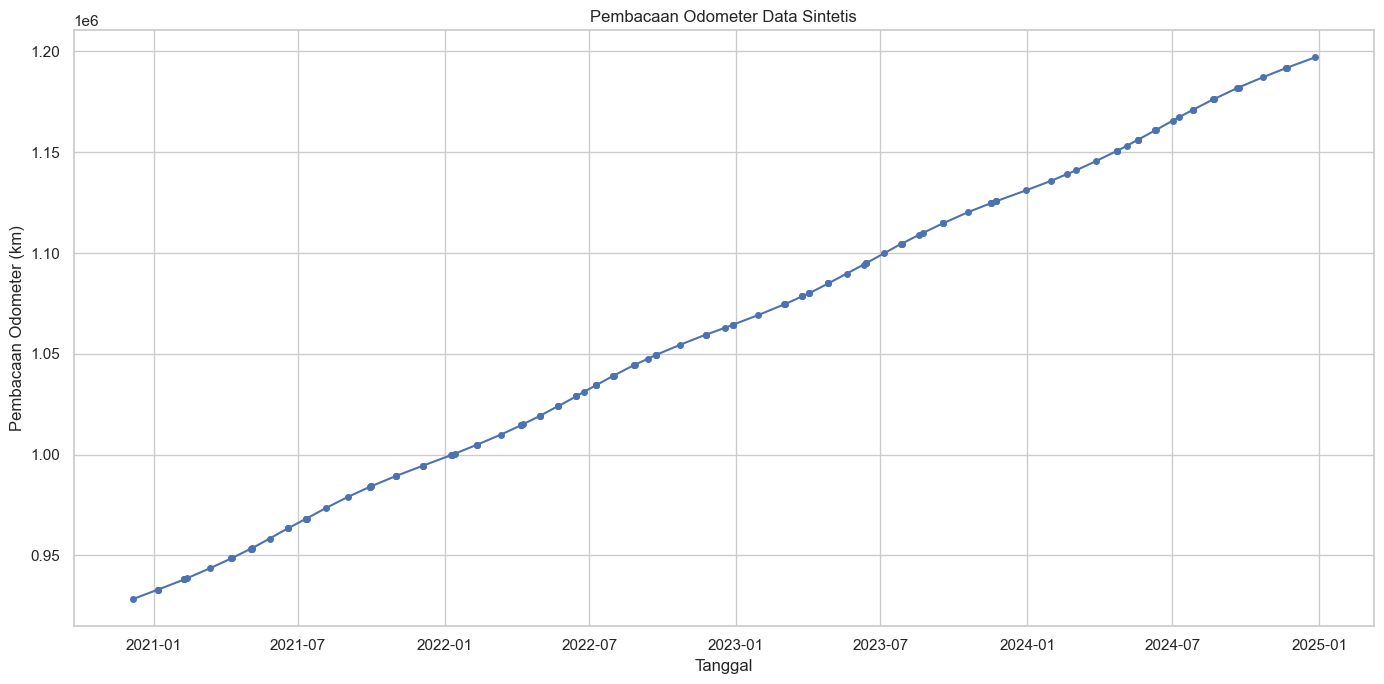

In [52]:
# Mengkonversi kembali odometer ke numeric untuk visualisasi
synthetic_maintenance_df['Odometer_Numeric'] = synthetic_maintenance_df['Current Odometer'].str.replace(',', '').astype(float)

# Visualisasi pembacaan odometer berdasarkan waktu
plt.figure(figsize=(14, 7))
plt.plot(synthetic_maintenance_df['Action Date'], synthetic_maintenance_df['Odometer_Numeric'], 'o-', markersize=4)
plt.title('Pembacaan Odometer Data Sintetis')
plt.xlabel('Tanggal')
plt.ylabel('Pembacaan Odometer (km)')
plt.grid(True)
plt.tight_layout()
plt.show()

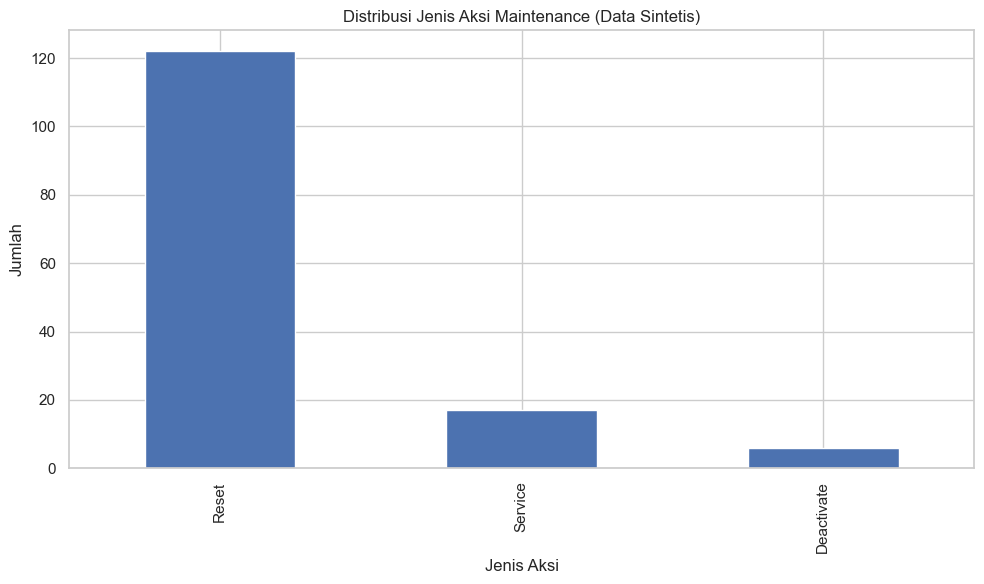

In [53]:
# Visualisasi distribusi jenis aksi maintenance
plt.figure(figsize=(10, 6))
synthetic_maintenance_df['Action'].value_counts().plot(kind='bar')
plt.title('Distribusi Jenis Aksi Maintenance (Data Sintetis)')
plt.xlabel('Jenis Aksi')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

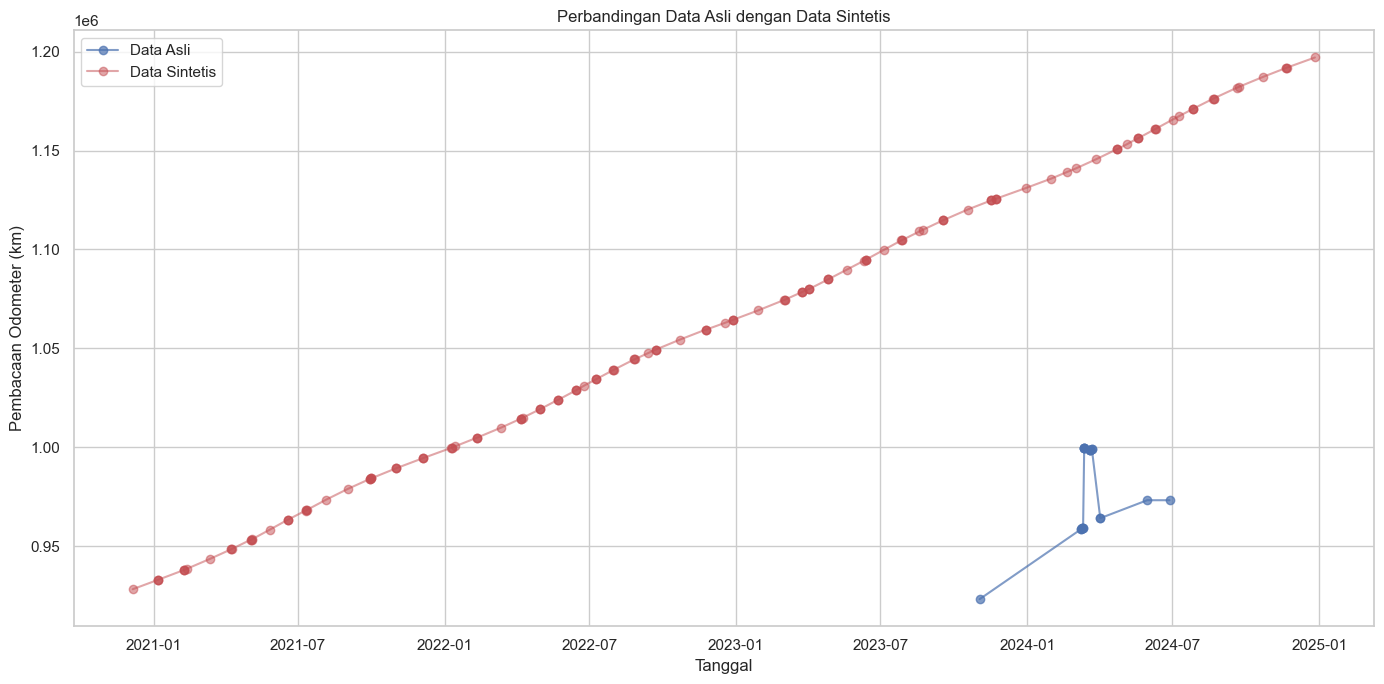

In [54]:
df_original_clean = df.copy()
df_original_clean['Odometer_Numeric'] = df_original_clean['Current Odometer']

plt.figure(figsize=(14, 7))
plt.plot(df_original_clean['Action Date'], df_original_clean['Odometer_Numeric'], 'bo-', label='Data Asli', alpha=0.7)
plt.plot(synthetic_maintenance_df['Action Date'], synthetic_maintenance_df['Odometer_Numeric'], 'ro-', label='Data Sintetis', alpha=0.5)
plt.title('Perbandingan Data Asli dengan Data Sintetis')
plt.xlabel('Tanggal')
plt.ylabel('Pembacaan Odometer (km)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Validasi Model Data Sintetis

Statistik Validasi Data Sintetis:
Min Daily Increase: 0.00
Max Daily Increase: 5548.00
Average Daily Increase: 1866.68
Std Dev Daily Increase: 2262.71


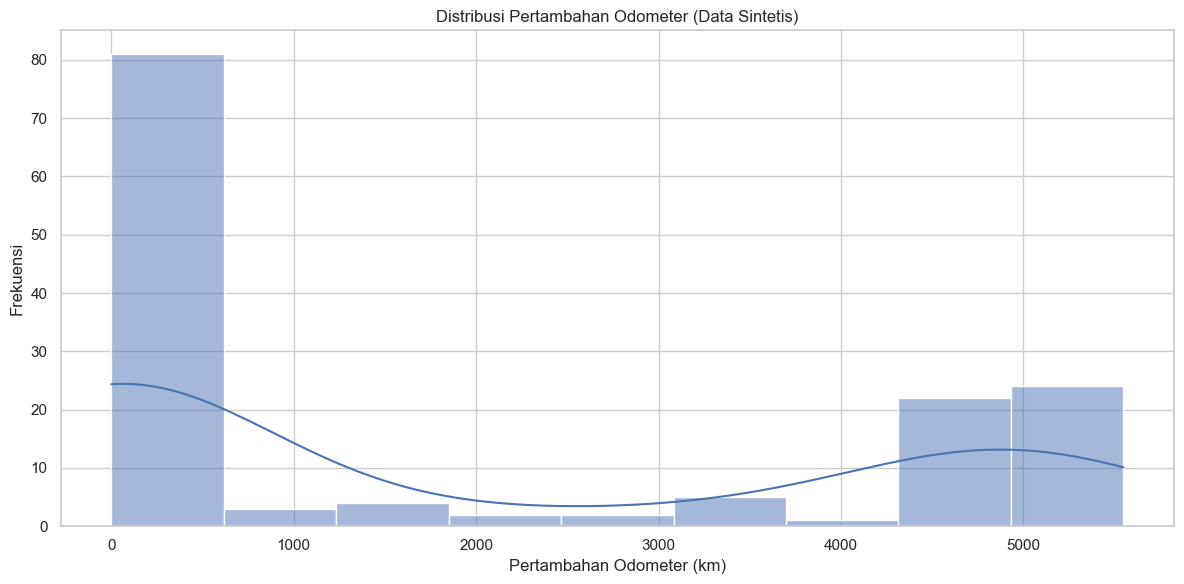

In [55]:
# Validasi pertambahan odometer
synthetic_maintenance_df = synthetic_maintenance_df.sort_values('Action Date')
synthetic_maintenance_df['Odometer_Numeric'] = synthetic_maintenance_df['Current Odometer'].str.replace(',', '').astype(float)
synthetic_maintenance_df['Odometer_Diff'] = synthetic_maintenance_df['Odometer_Numeric'].diff()

# Menghitung statistik validasi
validation_stats = {
    'Min Daily Increase': synthetic_maintenance_df['Odometer_Diff'].min(),
    'Max Daily Increase': synthetic_maintenance_df['Odometer_Diff'].max(),
    'Average Daily Increase': synthetic_maintenance_df['Odometer_Diff'].mean(),
    'Std Dev Daily Increase': synthetic_maintenance_df['Odometer_Diff'].std(),
}

# Menampilkan statistik validasi
print("Statistik Validasi Data Sintetis:")
for stat, value in validation_stats.items():
    print(f"{stat}: {value:.2f}")

# Visualisasi distribusi pertambahan odometer
plt.figure(figsize=(12, 6))
sns.histplot(synthetic_maintenance_df['Odometer_Diff'].dropna(), kde=True)
plt.title('Distribusi Pertambahan Odometer (Data Sintetis)')
plt.xlabel('Pertambahan Odometer (km)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
output_file = 'synthetic_truck_maintenance_data.csv'
synthetic_maintenance_df.drop('Odometer_Numeric', axis=1, errors='ignore').drop('Odometer_Diff', axis=1, errors='ignore').to_csv(output_file, index=False)

print(f"Data sintetis berhasil disimpan ke {output_file}")

Data sintetis berhasil disimpan ke synthetic_truck_maintenance_data.csv
